### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


In [63]:
# NAME: ANKIT CHAHAL
# Student ID: 47917903

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [42]:
# your code and solutions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading CSV from the same local folder

ecom_data = pd.read_csv("Ecommerce_Dataset.csv")
ecom_data.shape

(20000, 11)

In [43]:
#removing columns with null

columns_with_null = ["gender", "rating", "helpfulness"]
ecom_data_clean_1 = ecom_data.dropna(axis = 0, subset = columns_with_null)
ecom_data_clean_1.shape

(19934, 11)

In [44]:
#removing rows where review is none

ecom_data_clean_2 = ecom_data_clean_1.drop(ecom_data_clean_1.index[(ecom_data_clean_1.review == "none")])
ecom_data_clean_2.shape

(19916, 11)

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [45]:
# your code and solutions

# Unique users
unique_users = ecom_data_clean_2['userId'].nunique()
unique_users

8562

In [46]:
unique_reviews = ecom_data_clean_2['review'].nunique()
unique_item = ecom_data_clean_2['item'].nunique()
unique_categories = ecom_data_clean_2['category'].nunique()

In [47]:
unique_reviews

19459

In [48]:
unique_item

89

In [49]:
unique_categories

9

In [50]:
ecom_data_clean_2.describe()

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,19916.000000,19916.000000,19916.000000,19916.000000,19916.000000,19916.000000,19916.000000
mean,5498.589827,58993.228008,3.701798,2.595953,41.779976,82.186515,19.403043
std,3344.391672,37957.960964,1.404451,1.750888,27.278416,42.242266,11.626979
min,0.000000,10100.000000,1.000000,0.000000,0.000000,12.000000,0.000000
25%,1991.000000,21500.000000,3.000000,0.000000,17.000000,48.250000,9.000000
50%,5892.000000,52701.000000,4.000000,4.000000,41.000000,72.000000,19.000000
75%,8408.250000,91599.000000,5.000000,4.000000,65.000000,126.500000,30.000000
max,10808.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


In [51]:
ecom_data_females = ecom_data_clean_2[ecom_data_clean_2.gender == 'F']
ecom_data_females.shape

(9793, 11)

In [52]:
ecom_data_females.describe()

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000
mean,5533.094149,59167.472378,3.717451,2.586439,41.435209,82.563392,19.361789
std,3324.559586,38117.030326,1.395355,1.751956,27.271082,42.139878,11.719459
min,0.000000,10100.000000,1.000000,0.000000,0.000000,12.000000,0.000000
25%,2048.000000,21401.000000,3.000000,0.000000,17.000000,49.000000,9.000000
50%,5909.000000,52800.000000,4.000000,4.000000,41.000000,72.000000,19.000000
75%,8363.000000,91700.000000,5.000000,4.000000,65.000000,126.500000,30.000000
max,10805.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


In [53]:
ecom_data_males = ecom_data_clean_2[ecom_data_clean_2.gender == 'M']
ecom_data_males.shape

(10123, 11)

In [54]:
ecom_data_males.describe()

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,10123.000000,10123.000000,10123.000000,10123.000000,10123.000000,10123.000000,10123.000000
mean,5465.210313,58824.663835,3.686654,2.605157,42.113504,81.821923,19.442952
std,3363.293294,37804.558980,1.413098,1.749892,27.282709,42.339969,11.537247
min,2.000000,10100.000000,1.000000,0.000000,0.000000,12.000000,0.000000
25%,1934.000000,21600.000000,3.000000,0.000000,18.000000,48.250000,9.000000
50%,5880.000000,52700.000000,4.000000,4.000000,41.000000,71.520000,19.000000
75%,8423.000000,91351.500000,5.000000,4.000000,66.000000,126.500000,29.000000
max,10808.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


In [55]:
# grouping by Item ID and finding out the mean for ratings for each item.

itemID_group = ecom_data_clean_2.groupby('item_id').agg({'rating': ['mean', 'std', 'min', 'max']})
print(itemID_group)

           rating                    
             mean       std  min  max
item_id                              
0        2.500532  1.368528  1.0  5.0
1        3.412481  1.541706  1.0  5.0
2        3.541401  1.263341  1.0  5.0
3        3.683333  1.571095  1.0  5.0
4        3.054054  1.417015  1.0  5.0
5        4.314286  1.097966  1.0  5.0
6        4.311111  1.030600  1.0  5.0
7        3.319277  1.348576  1.0  5.0
8        3.822695  1.272139  1.0  5.0
9        3.736402  1.284022  1.0  5.0
10       2.172414  1.433278  1.0  5.0
11       4.191358  1.006402  1.0  5.0
12       2.548673  1.455399  1.0  5.0
13       4.728873  0.698619  1.0  5.0
14       4.844086  0.444051  2.0  5.0
15       3.564103  1.325577  1.0  5.0
16       3.185567  1.322032  1.0  5.0
17       3.876471  1.088960  1.0  5.0
18       4.371622  0.942427  1.0  5.0
19       3.113333  1.313516  1.0  5.0
20       3.005025  1.519229  1.0  5.0
21       4.377246  0.868573  1.0  5.0
22       4.070588  1.041031  1.0  5.0
23       3.2

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

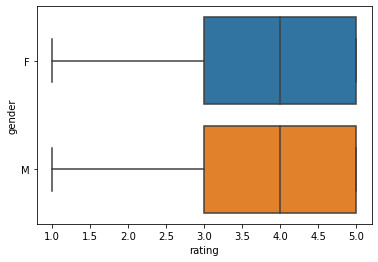

In [56]:
# your code and solutions

import seaborn as sns

sns.boxplot(data = ecom_data_clean_2, x='rating', y ='gender')

Answer: From the above BOX PLOT there seems to be no correlation between the ratings given by the female users and the male users. Box plot for both genders have same Median, Upper quartile and the lower quartile.

In [57]:
ecom_data_clean_2['helpfulness'].corr(ecom_data_clean_2['rating'])

-0.0003192683316425124

The correlation beteween helpfulness and rating is on the negative side, meaning helpfulness somewhat increases with the decrease in ratings. But, NOTHING CAN BE CONCLUDED because the number is very close to ZERO.

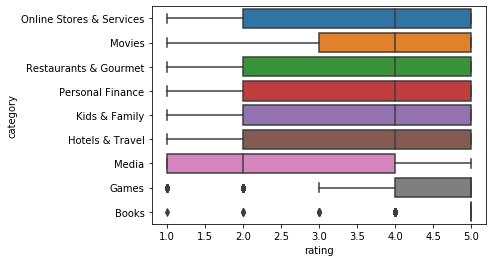

In [58]:
sns.boxplot(data = ecom_data_clean_2, x='rating', y ='category')

From the above Boxplot, we can see that most categories have a mean rating of 4 and lower quartile of 2 and upper quartile of 5. In case of media the mean is only 2, with lower qurtile being just 1, meaning users tend to not like media much. But when it comes to Movies the lower qurtile is 3 and upper quartile is 5 and for games also it's in the higher range, meaning, on an average users like moveis and games more than all other categories.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [59]:
# your code and solutions

#removing data where helpfulness is less than 2

filtered_data1 = ecom_data_clean_2.drop(ecom_data_clean_2.index[(ecom_data_clean_2.helpfulness <= 2)])
filtered_data1.shape

(13643, 11)

In [60]:
# removing data for users who rated less than 7 items

min_rating_count = 7
filtered_data2 = []

unique_users = filtered_data1['userId'].unique()

for user_id in unique_users:
    user_data = filtered_data1[filtered_data1['userId'] == user_id]
    if user_data['rating'].count() >= min_rating_count:
        filtered_data2.append(user_data)

filtered_data2 = pd.concat(filtered_data2)

filtered_data2.shape

(2741, 11)

In [61]:
#removing items that receive less than 11 ratings

#here instead of using a for loop using 1 line code to group and filter

min_rate_count_items = 11
filtered_data3 = filtered_data2[filtered_data2.groupby('item_id')['rating'].transform('count') >= min_rate_count_items ]
filtered_data3.shape

(2685, 11)

In [62]:
len(filtered_data3)

2685